In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [32]:
df = pd.read_csv("gurgaon_properties_missing_value_imputation.csv")

In [33]:
df.shape

(3553, 18)

In [34]:
df.head()

property_type               society      sector  price  price_per_sqft  \
0         house    vipul tatvam villa   sector 48   7.25         22377.0   
1          flat    imperia the esfera  sector 37c   0.86          4886.0   
2          flat        dlf the ultima   sector 81   2.25         10553.0   
3         house           independent   sector 57   6.25          2778.0   
4          flat  umang monsoon breeze   sector 78   0.95          5491.0   

   bedRoom  bathroom balcony  floorNum   agePossession  built_up_area  \
0      4.0       4.0       3       2.0  Relatively New         3240.0   
1      3.0       3.0       2       0.0    New Property         1593.0   
2      3.0       3.0      3+       6.0    New Property         1929.0   
3      9.0       9.0      3+       3.0    New Property         2660.0   
4      3.0       3.0       2       9.0  Relatively New         1730.0   

   study room  servant room  store room  pooja room  others  furnishing_type  \
0           1             1           1           1       0                2   
1           0             0           0           0       1                0   
2           0             1           0           0       0                1   
3           0             1           0           0       0                2   
4           0             0           0           0       0                2   

   luxury_score  
0           103  
1            35  
2           168  
3            61  
4            65

In [35]:
latlong = pd.read_csv('latlong.csv')

In [36]:
latlong

sector             coordinates
0       sector 1  28.3663° N, 76.9456° E
1       sector 2  28.5095° N, 77.0320° E
2       sector 3  28.4909° N, 77.0176° E
3       sector 4  28.4738° N, 77.0107° E
4       sector 5  28.4794° N, 77.0176° E
..           ...                     ...
124   sector 113  28.5287° N, 77.0233° E
125   sector 114  28.5334° N, 77.0118° E
126   sector 115  28.5385° N, 77.0061° E
127  gwal pahari  28.4484° N, 77.0210° E
128      manesar  28.3515° N, 76.9428° E

[129 rows x 2 columns]

In [37]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [38]:
latlong.head()

sector             coordinates  latitude  longitude
0  sector 1  28.3663° N, 76.9456° E   28.3663    76.9456
1  sector 2  28.5095° N, 77.0320° E   28.5095    77.0320
2  sector 3  28.4909° N, 77.0176° E   28.4909    77.0176
3  sector 4  28.4738° N, 77.0107° E   28.4738    77.0107
4  sector 5  28.4794° N, 77.0176° E   28.4794    77.0176

In [39]:
new_df = df.merge(latlong, on='sector')
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [65]:
new_df

property_type               society      sector  price  price_per_sqft  \
0            house    vipul tatvam villa   sector 48   7.25         22377.0   
1             flat    imperia the esfera  sector 37c   0.86          4886.0   
2             flat        dlf the ultima   sector 81   2.25         10553.0   
3            house           independent   sector 57   6.25          2778.0   
4             flat  umang monsoon breeze   sector 78   0.95          5491.0   
...            ...                   ...         ...    ...             ...   
3278          flat       raheja vedaanta  sector 108   0.85          4637.0   
3279         house           independent    sector 4   0.61         11111.0   
3280          flat            ild greens  sector 37c   1.05          7500.0   
3281          flat            sobha city  sector 108   2.90         14478.0   
3282          flat    ramprastha primera  sector 37d   1.08          6000.0   

      bedRoom  bathroom balcony  floorNum   agePossession  ...  study room  \
0         4.0       4.0       3       2.0  Relatively New  ...           1   
1         3.0       3.0       2       0.0    New Property  ...           0   
2         3.0       3.0      3+       6.0    New Property  ...           0   
3         9.0       9.0      3+       3.0    New Property  ...           0   
4         3.0       3.0       2       9.0  Relatively New  ...           0   
...       ...       ...     ...       ...             ...  ...         ...   
3278      3.0       3.0       2       2.0  Relatively New  ...           0   
3279      2.0       2.0       2       2.0  Moderately Old  ...           0   
3280      3.0       3.0       3       4.0    New Property  ...           0   
3281      3.0       4.0       2       8.0    New Property  ...           0   
3282      3.0       3.0       3       9.0  Relatively New  ...           0   

      servant room  store room  pooja room  others  furnishing_type  \
0                1           1           1       0                2   
1                0           0           0       1                0   
2                1           0           0       0                1   
3                1           0           0       0                2   
4                0           0           0       0                2   
...            ...         ...         ...     ...              ...   
3278             1           0           0       0                0   
3279             0           0           0       1                0   
3280             0           0           0       0                2   
3281             0           0           0       0                0   
3282             0           0           0       0                0   

      luxury_score             coordinates latitude  longitude  
0              103  28.4177° N, 77.0359° E  28.4177    77.0359  
1               35  28.4515° N, 76.9882° E  28.4515    76.9882  
2              168  28.3867° N, 76.9485° E  28.3867    76.9485  
3               61  28.4232° N, 77.0752° E  28.4232    77.0752  
4               65  28.3733° N, 76.9729° E  28.3733    76.9729  
...            ...                     ...      ...        ...  
3278            65  28.5134° N, 76.9830° E  28.5134    76.9830  
3279            14  28.4738° N, 77.0107° E  28.4738    77.0107  
3280             5  28.4515° N, 76.9882° E  28.4515    76.9882  
3281           109  28.5134° N, 76.9830° E  28.5134    76.9830  
3282           158  28.4478° N, 76.9703° E  28.4478    76.9703  

[3283 rows x 21 columns]

In [75]:
group_df = new_df.groupby('sector').mean(numeric_only=True)[['price','price_per_sqft','built_up_area','latitude','longitude']]

In [77]:
group_df

price  price_per_sqft  built_up_area  latitude  longitude
sector                                                                   
gwal pahari  3.192222     9585.777778    3056.166667   28.4484    77.0210
manesar      0.962258     4608.064516    2027.367742   28.3515    76.9428
sector 1     1.860000     8249.833333    2327.833333   28.3663    76.9456
sector 102   1.696636    10603.822430    1556.130841   28.4750    76.9715
sector 103   1.495000     7445.785714    1865.428571   28.4949    76.9845
...               ...             ...            ...       ...        ...
sector 92    0.939796     5922.744898    1580.420204   28.4079    76.9153
sector 93    0.848889     8009.888889    1017.000000   28.4153    76.9326
sector 95    0.467797     5130.220339    5892.305085   28.4172    76.9081
sector 99    1.478182     6810.181818    1748.363636   28.4640    76.9614
sector 99a   0.816000     6257.733333    1188.833333   28.4561    76.9542

[105 rows x 5 columns]

In [83]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()


In [85]:
new_df.to_csv('data_viz1.csv',index=False)

In [87]:
df1 = pd.read_csv('gurgaon_properties.csv')
df1.head()

property_name property_type  \
0  4 Bedroom House for sale in Sector 48 Gurgaon         house   
1               3 BHK Flat in Sector 37C Gurgaon          flat   
2  3 Bedroom House for sale in Sector 40 Gurgaon         house   
3                3 BHK Flat in Sector 81 Gurgaon          flat   
4  9 Bedroom House for sale in Sector 57 Gurgaon         house   

              society  price  price_per_sqft     area  \
0  vipul tatvam villa   7.25        201388.0    360.0   
1  imperia the esfera   0.86          4886.0   1760.0   
2         independent   2.10         23333.0    900.0   
3      dlf the ultima   2.25         10553.0   2132.0   
4         independent   6.25          2778.0  22498.0   

                                        areaWithType  bedRoom  bathroom  \
0                         Plot area 360(33.45 sq.m.)        4         4   
1             Super Built up area 1760(163.51 sq.m.)        3         3   
2                         Plot area 900(83.61 sq.m.)        3         3   
3             Super Built up area 2132(198.07 sq.m.)        3         3   
4  Plot area 3100(2591.99 sq.m.)Built Up area: 26...        9         9   

  balcony                                 additionalRoom  \
0       3  pooja room,study room,servant room,store room   
1       2                                         others   
2       2                                         others   
3      3+                                   servant room   
4      3+                                   servant room   

                                             address  floorNum      facing  \
0                Sector 48 Gurgaon, Gurgaon, Haryana       2.0         NaN   
1               Sector 37C Gurgaon, Gurgaon, Haryana       0.0         NaN   
2                Sector 40 Gurgaon, Gurgaon, Haryana       3.0       North   
3           123, Sector 81 Gurgaon, Gurgaon, Haryana       6.0        East   
4  26.........., Sector 57 Gurgaon, Gurgaon, Haryana       3.0  North-East   

      agePossession                                    nearbyLocations  \
0   1 to 5 Year Old  ['Athena', 'Star Mall', 'The Sixth Element Sch...   
1   0 to 1 Year Old  ['Approved Sector 37 Mero Station', 'Esplanade...   
2  5 to 10 Year Old  ['Huda city centre metro station', 'Axis bank ...   
3   0 to 1 Year Old  ['Huda Metro Station (Gurugram)', 'Vatika Town...   
4   0 to 1 Year Old  ['Chhattarpur Mandir Complex', 'Temple', 'Masj...   

                                         description  \
0  360 sqyrd 4 bhk plus servent builder floor apa...   
1  Ready to move in ground floor flat in new soci...   
2  Near by huda market near by park near by nh-8 ...   
3  Urgent available for sale 3 bhk flat in sector...   
4  Are you planning to buy your dream home? You c...   

                                      furnishDetails  \
0  ['5 Wardrobe', '1 Water Purifier', '4 Fan', '1...   
1                                                NaN   
2  ['5 Wardrobe', '6 Fan', '1 Exhaust Fan', '7 Ge...   
3  ['1 Fridge', '5 Fan', '1 Exhaust Fan', '5 Geys...   
4  ['9 Wardrobe', '1 Water Purifier', '12 Fan', '...   

                                            features  \
0  ['Feng Shui / Vaastu Compliant', 'Private Gard...   
1  ['Feng Shui / Vaastu Compliant', 'Lift(s)', 'M...   
2  ['Feng Shui / Vaastu Compliant', 'Private Gard...   
3  ['Centrally Air Conditioned', 'Water purifier'...   
4  ['Private Garden / Terrace', 'Water purifier',...   

                                              rating  
0  ['Environment4 out of 5', 'Lifestyle4 out of 5...  
1  ['Environment5 out of 5', 'Lifestyle4 out of 5...  
2  ['Environment4 out of 5', 'Lifestyle4 out of 5...  
3  ['Green Area5 out of 5', 'Construction4 out of...  
4  ['Environment4 out of 5', 'Lifestyle4 out of 5...

In [89]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]
wordcloud_df.head()

features      sector
0  ['Feng Shui / Vaastu Compliant', 'Private Gard...   sector 48
1  ['Feng Shui / Vaastu Compliant', 'Lift(s)', 'M...  sector 37c
2  ['Feng Shui / Vaastu Compliant', 'Private Gard...   sector 81
3  ['Centrally Air Conditioned', 'Water purifier'...   sector 57
4  ['Private Garden / Terrace', 'Water purifier',...   sector 78

In [91]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

main

['Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Low Density Society',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Feng Shui / Vaastu Compliant',
 'Lift(s)',
 'Maintenance Staff',
 'Park',
 'Visitor Parking',
 'Security Personnel',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Water Storage',
 'Visitor Parking',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'Water Storage',
 'Separate entry for servan

In [93]:
from wordcloud import WordCloud
feature_text = ' '.join(main)
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))
feature_text

'Feng Shui / Vaastu Compliant Private Garden / Terrace High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Visitor Parking Swimming Pool Park Security Personnel Low Density Society Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house / Community Center Feng Shui / Vaastu Compliant Lift(s) Maintenance Staff Park Visitor Parking Security Personnel Feng Shui / Vaastu Compliant Private Garden / Terrace Water Storage Visitor Parking Waste Disposal Rain Water Harvesting Centrally Air Conditioned Water purifier Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff Water Storage Separate entry for servant room No open drainage around Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Sp

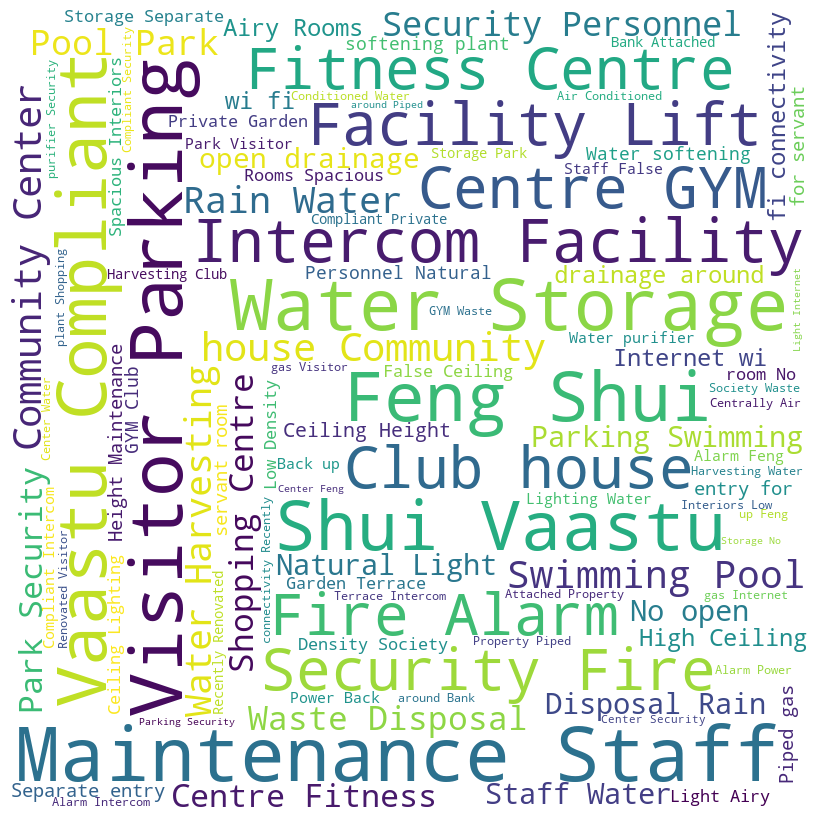

In [95]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

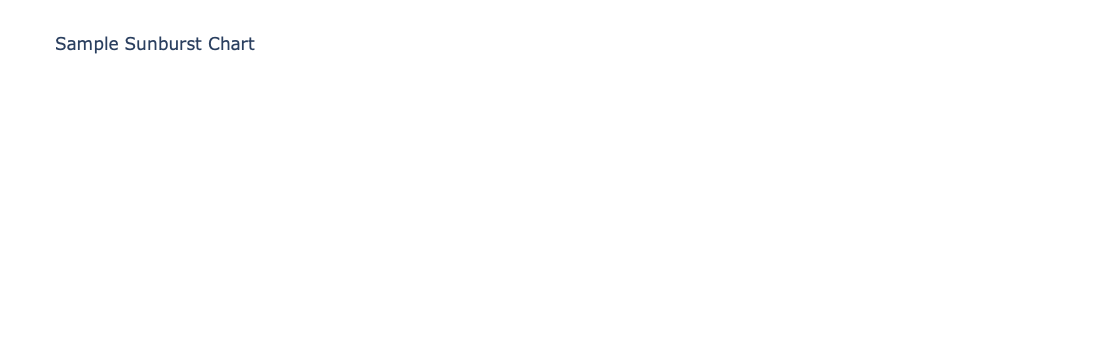

In [99]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

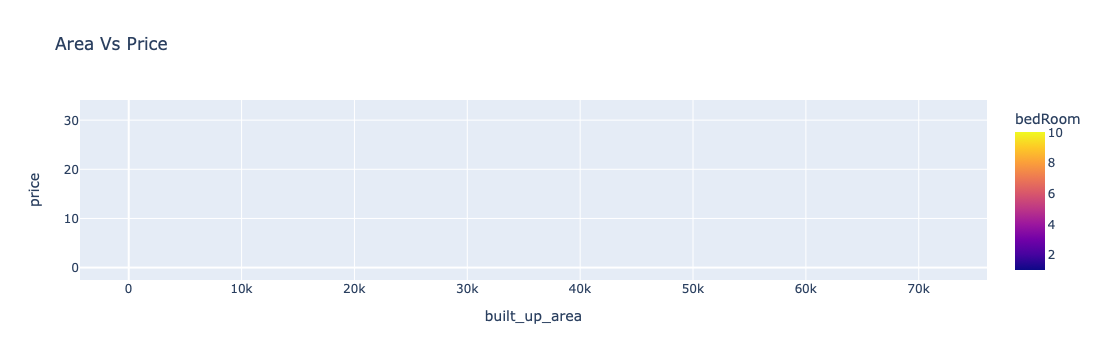

In [101]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

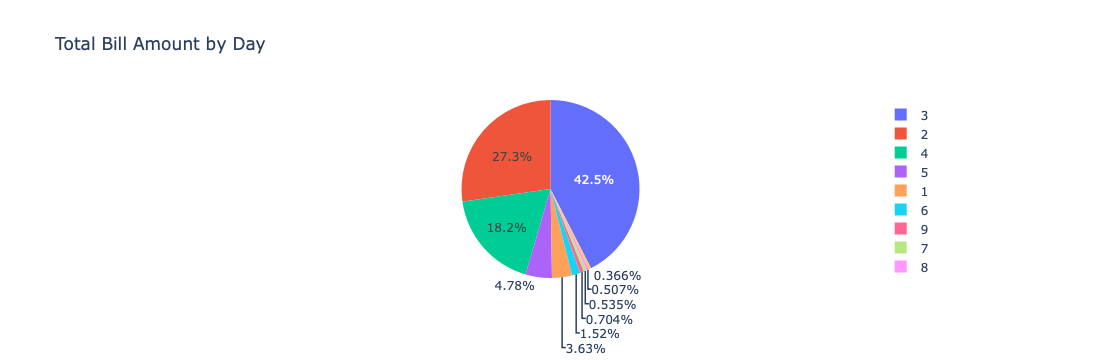

In [103]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

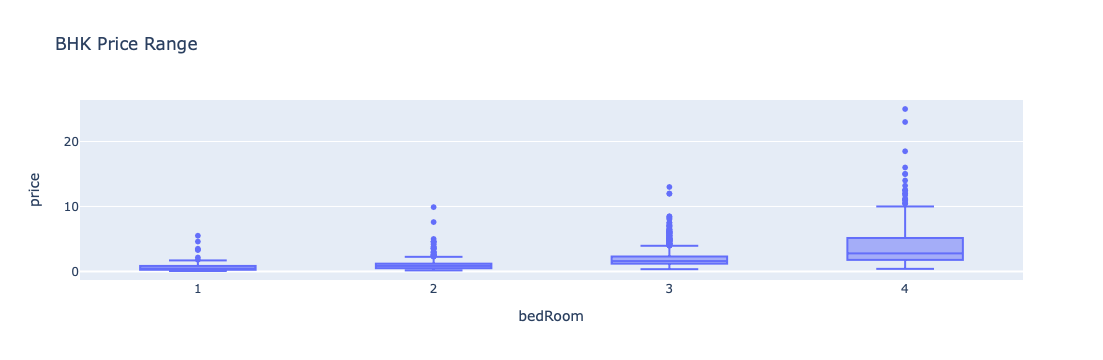

In [105]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()

/var/folders/7w/tfyt6rt124n73xvzq62ryd7m0000gn/T/ipykernel_85475/3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/var/folders/7w/tfyt6rt124n73xvzq62ryd7m0000gn/T/ipykernel_85475/3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for his

<Axes: xlabel='price', ylabel='Density'>

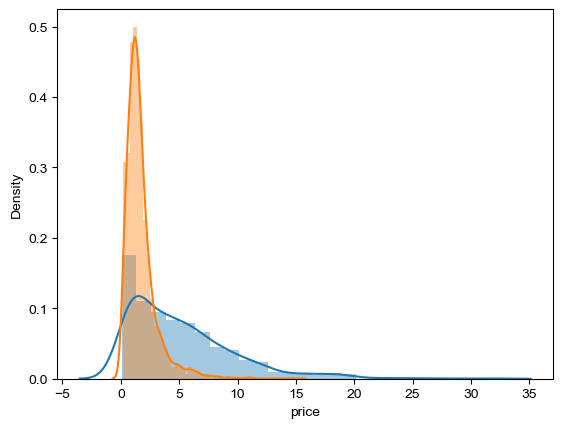

In [107]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [109]:
new_df['sector'].unique().tolist().insert(0,'overall')